In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import glob
import utils

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
mnist=tf.keras.datasets.mnist

In [39]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()
x_train=x_train/255.
x_test=x_test/255.
#x_train=tf.keras.utils.normalize(x_train, axis=1)
#x_test=tf.keras.utils.normalize(x_test, axis=1)

In [40]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
inputs=tf.keras.layers.Input((512, 512, 4))
con1=tf.keras.layers.Conv2D(32, (3,3), padding="same")

In [47]:
con1.output_shape()

AttributeError: The layer has never been called and thus has no defined output shape.

In [41]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.2555 - acc: 0.9240
Epoch 2/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1073 - acc: 0.9672
Epoch 3/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0780 - acc: 0.9754
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0587 - acc: 0.9815
Epoch 5/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0486 - acc: 0.9847
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0408 - acc: 0.9875
Epoch 7/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.0340 - acc: 0.9887
Epoch 8/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0285 - acc: 0.9905
Epoch 9/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0256 - acc: 0.9912
Epoch 10/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0223 - a

In [42]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 44us/step


[0.08487022892248133, 0.9794]

In [32]:
guesses=np.argmax(model.predict([x_test]), axis=1)

# Faces

In [58]:
data='/home/ubuntu/AutoEncoder/'

In [59]:
training_data=np.asarray([plt.imread(f) for f in glob.glob(data+'Trainingv2/*.tif')])
training_data=training_data/256

(9, 128, 128, 3)
(9, 128, 128, 3)


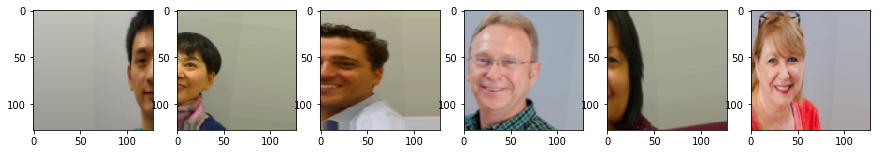

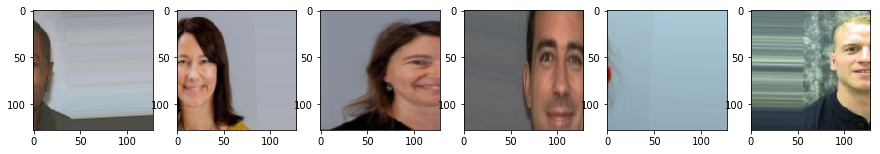

In [60]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(fill_mode='nearest', rotation_range=8, width_shift_range=100, zoom_range=[0.5,1.2], horizontal_flip=True)
# fit parameters from data
datagen.fit(training_data)
# configure batch size and retrieve one batch of images
tmp=0
for X_batch, y_batch in datagen.flow(training_data, training_data, batch_size=9):
    print(X_batch.shape)
    utils.plot_6x1(X_batch[0, :, :], X_batch[1, :, :], X_batch[2, :, :], X_batch[3, :, :], X_batch[4, :, :], X_batch[5, :, :])
    tmp=tmp+1
    if (tmp==2):
        break

# Yeast

In [43]:
data='/home/ubuntu/TransmittedYeast/'

In [44]:
shp=[1,256,256,2]

In [47]:
train_both=utils.get_raw_float_image(data+'TrainingWindows.raw',shp)
train_data=train_both[:,:,:,[0]]/25000.0
train_truth=train_both[:,:,:,[1]]
train_truth[:,:,:,0]=train_truth[:,:,:,0]/255.0

In [48]:
validation_both=utils.get_raw_float_image(data+'TrainingWindows.raw', shp)
validation_data=validation_both[:,:,:,[0]]/25000.0
validation_truth=validation_both[:,:,:,[1]]
validation_truth[:,:,:,0]=validation_truth[:,:,:,0]/255.0

In [62]:
data_gen_args = dict(fill_mode='nearest', rotation_range=30, width_shift_range=20, horizontal_flip=True, vertical_flip=True, zoom_range=0.04)
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**data_gen_args)
mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1

image_generator = image_datagen.flow(train_data,seed=seed, batch_size=10)

mask_generator = mask_datagen.flow(train_truth, seed=seed, batch_size=10)

train_generator = zip(image_generator, mask_generator)

def generate_data():

    
    for xx, yy in train_generator:
        return (xx,yy)

In [63]:
tf.reset_default_graph()
#Input and output
x=tf.placeholder(dtype=tf.float32, shape=[None, 256,256,1], name='x')
y=tf.placeholder(dtype=tf.float32, shape=[None, 256,256,1], name='y')
lr=tf.placeholder(dtype=tf.float32)

xr=x
yr=y

base_scaler=32

#Going down
A1=(tf.layers.conv2d(xr, base_scaler, [5,5], padding='SAME'))
A2=(tf.layers.conv2d(A1, base_scaler, [3,3], padding='SAME'))

B0=tf.nn.max_pool(A2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
B1=(tf.layers.conv2d(B0, 2*base_scaler, [3,3], padding='SAME'))
B2=(tf.layers.conv2d(B1, 2*base_scaler, [3,3], padding='SAME'))

C0=tf.nn.max_pool(B2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
C1=(tf.layers.conv2d(C0, 4*base_scaler, [3,3], padding='SAME'))
C2=(tf.layers.conv2d(C1, 4*base_scaler, [3,3], padding='SAME'))

D0=tf.nn.max_pool(C2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
D1=(tf.layers.conv2d(D0, 8*base_scaler, [3,3], padding='SAME'))
D2=(tf.layers.conv2d(D1, 8*base_scaler, [3,3], padding='SAME'))

E0=tf.nn.max_pool(D2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
E1=(tf.layers.conv2d(E0, 16*base_scaler, [3,3], padding='SAME'))
E2=(tf.layers.conv2d(E1, 16*base_scaler, [3,3], padding='SAME'))

F0=tf.nn.max_pool(E2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
F1=(tf.layers.conv2d(F0, 32*base_scaler, [3,3], padding='SAME'))
F2=(tf.layers.conv2d(F1, 32*base_scaler, [3,3], padding='SAME'))



#Coming up
EE0=tf.layers.conv2d_transpose(F2, 8*base_scaler, kernel_size=[3,3], strides=[2, 2], padding='SAME')
EE1=tf.concat(axis=3, values=[EE0,E2])
EE2=(tf.layers.conv2d(EE1, 16*base_scaler, [3,3], padding='SAME'))
EE3=(tf.layers.conv2d(EE2, 16*base_scaler, [3,3], padding='SAME'))

DD0=tf.layers.conv2d_transpose(EE2, 8*base_scaler, kernel_size=[3,3], strides=[2, 2], padding='SAME')
DD1=tf.concat(axis=3, values=[DD0,D2])
DD2=(tf.layers.conv2d(DD1, 8*base_scaler, [3,3], padding='SAME'))
DD3=(tf.layers.conv2d(DD2, 8*base_scaler, [3,3], padding='SAME'))

CC0=tf.layers.conv2d_transpose(DD3, 4*base_scaler, kernel_size=[3,3], strides=[2, 2], padding='SAME')
CC1=tf.concat(axis=3, values=[CC0,C2])
CC2=(tf.layers.conv2d(CC1, 4*base_scaler, [3,3], padding='SAME'))
CC3=(tf.layers.conv2d(CC2, 4*base_scaler, [3,3], padding='SAME'))

BB0=tf.layers.conv2d_transpose(CC3, 2*base_scaler, kernel_size=[3,3], strides=[2, 2], padding='SAME')
#BB0=tf.contrib.layers.conv2d_transpose(C2, 2*base_scaler, kernel_size=[3,3], stride=[2, 2], padding='SAME')
BB1=tf.concat(axis=3, values=[BB0,B2])
BB2=(tf.layers.conv2d(BB1, 2*base_scaler, [3,3], padding='SAME'))
BB3=(tf.layers.conv2d(BB2, 2*base_scaler, [3,3], padding='SAME'))

AA0=tf.layers.conv2d_transpose(BB3, base_scaler, kernel_size=[3,3], strides=[2, 2], padding='SAME')
AA1=tf.concat(axis=3, values=[AA0,A2])
AA2=(tf.layers.conv2d(AA1, base_scaler, [3,3], padding='SAME'))
AA3=(tf.layers.conv2d(AA2, base_scaler, [3,3], padding='SAME'))

logits=utils.leaky_relu(tf.layers.conv2d(AA3, 1, [1,1], padding='SAME'))
probs=tf.tanh(logits, name='probabilities')

diff=tf.subtract(probs, yr)
LSQ=tf.multiply(diff,diff)
#Added this to make the outlines more potent in error function
#OutError, MaskError=tf.split(LSQ, [1,1], 3)
#loss=1*tf.reduce_mean(OutError)+0.1*tf.reduce_mean(MaskError)
loss=tf.reduce_mean(LSQ, name='error')

train_op=tf.train.AdamOptimizer(learning_rate=lr, name='trainer').minimize(loss)

0
Training loss:  0.19193932
(10, 256, 256, 1)
Validation loss:  0.0802493


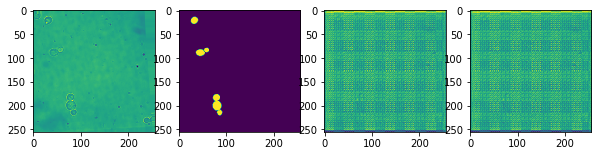

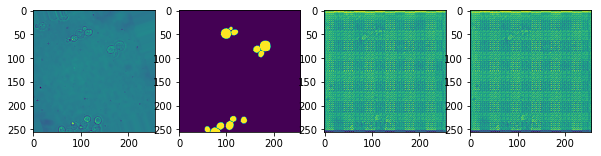

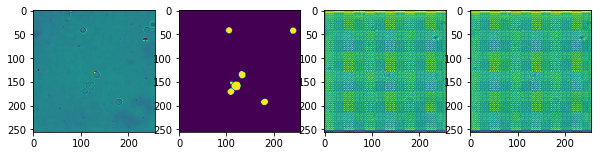

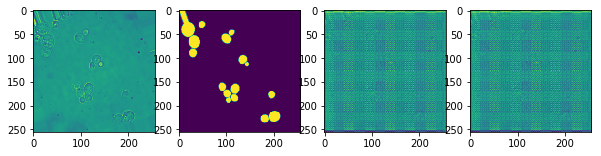

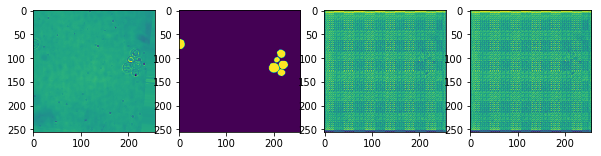

20
Training loss:  0.030026983
(10, 256, 256, 1)
Validation loss:  0.024634257


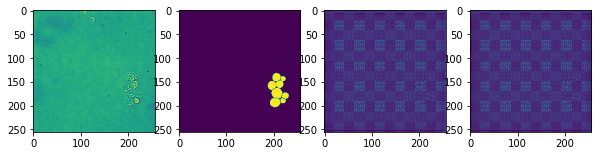

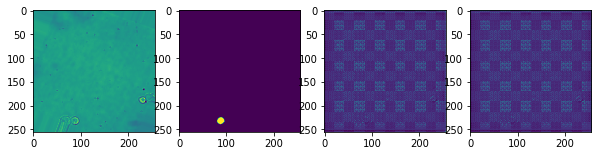

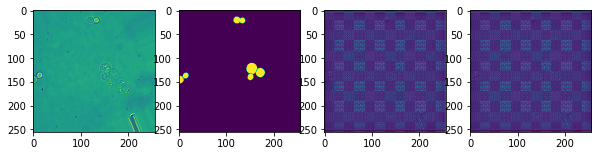

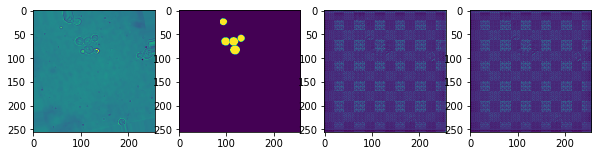

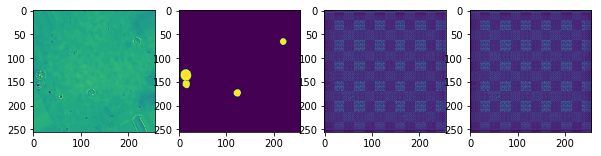

40
Training loss:  0.038594227
(10, 256, 256, 1)
Validation loss:  0.02271496


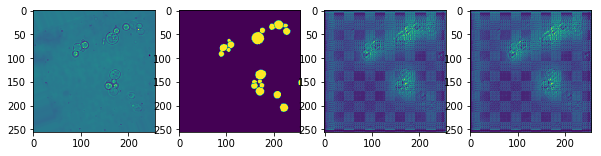

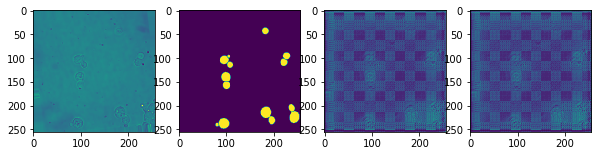

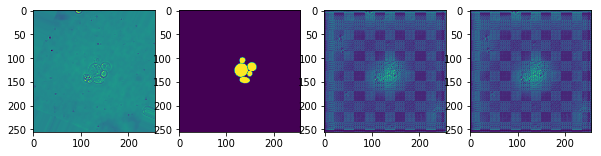

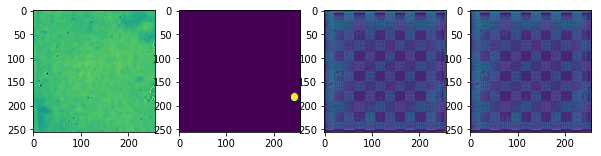

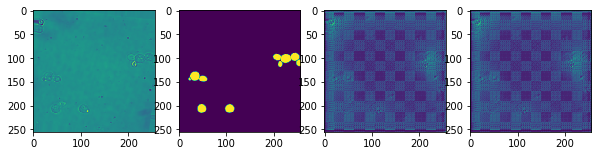

60
Training loss:  0.029052008
(10, 256, 256, 1)
Validation loss:  0.029970601


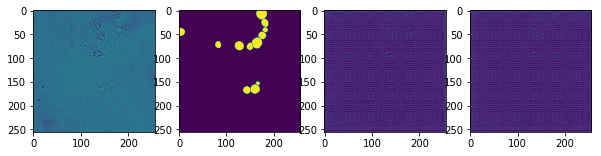

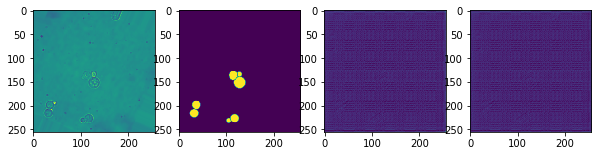

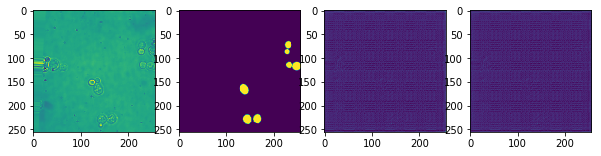

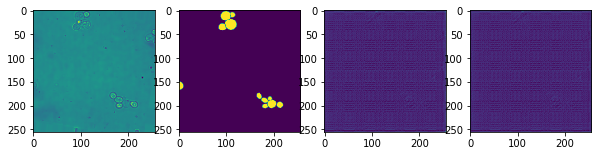

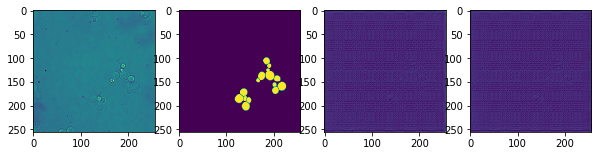

80
Training loss:  0.030463517
(10, 256, 256, 1)
Validation loss:  0.039680764


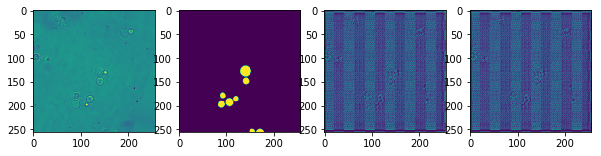

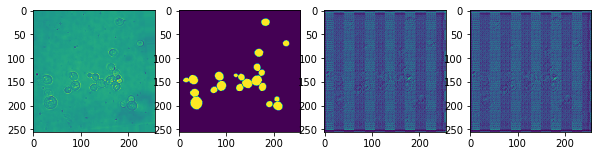

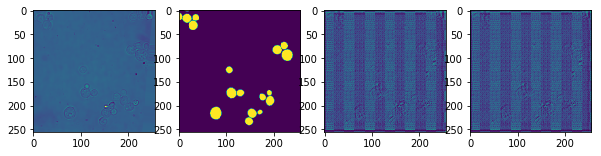

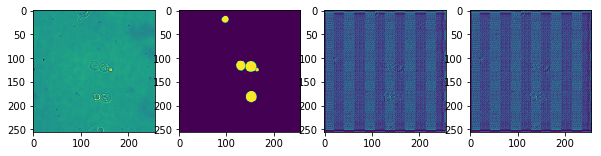

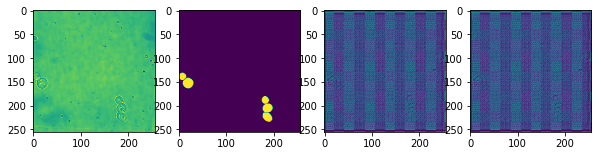

100
Training loss:  0.025528556
(10, 256, 256, 1)
Validation loss:  0.02803919


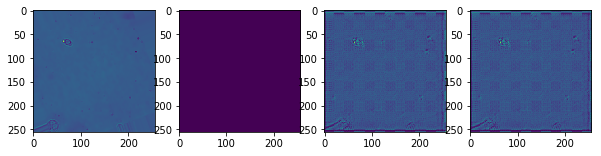

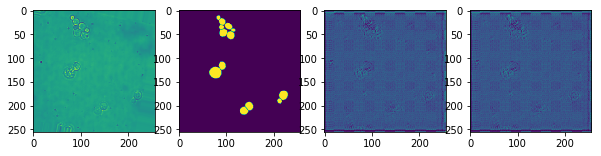

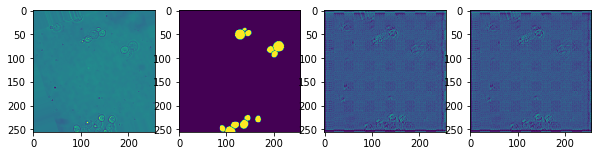

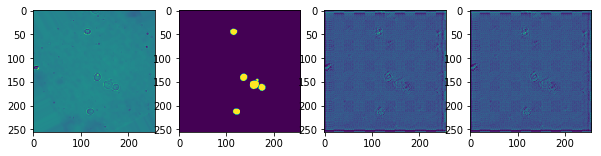

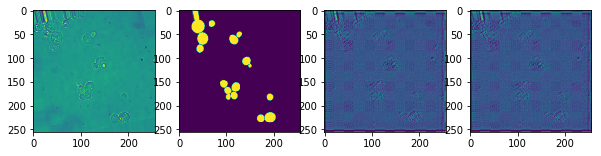

120
Training loss:  0.029365838
(10, 256, 256, 1)
Validation loss:  0.031086188


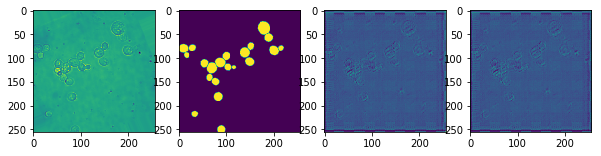

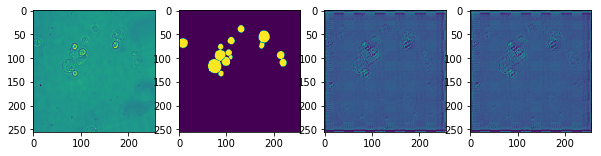

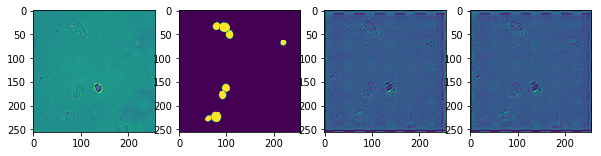

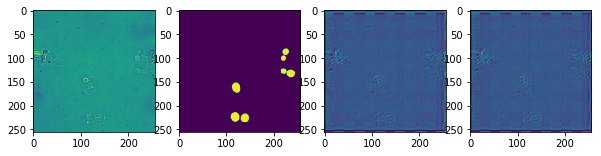

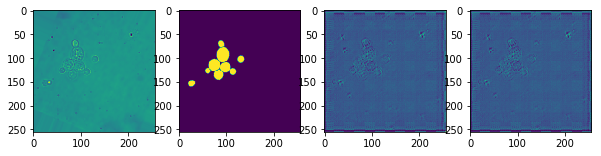

140
Training loss:  0.034311473
(10, 256, 256, 1)
Validation loss:  0.034052998


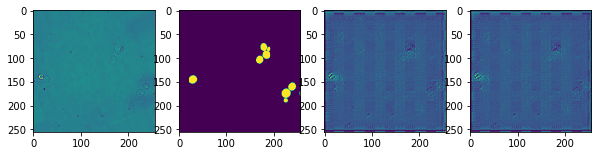

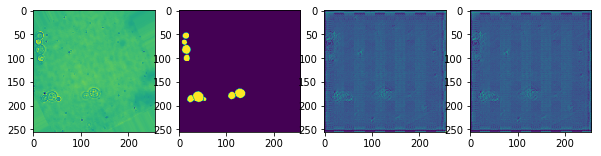

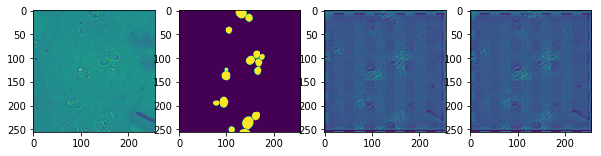

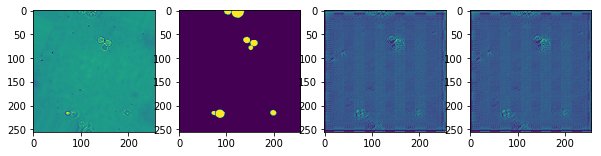

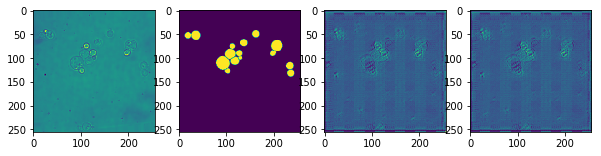

160
Training loss:  0.024998227
(10, 256, 256, 1)
Validation loss:  0.027892929


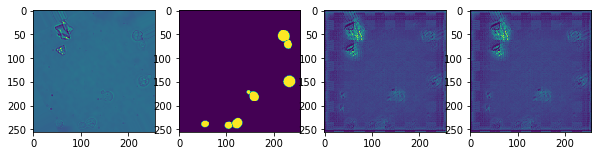

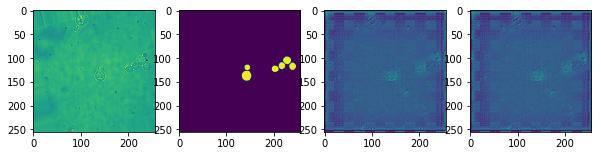

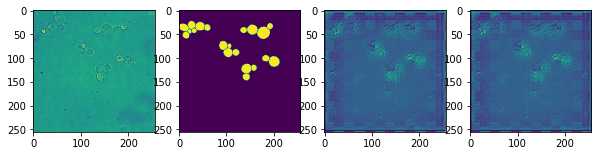

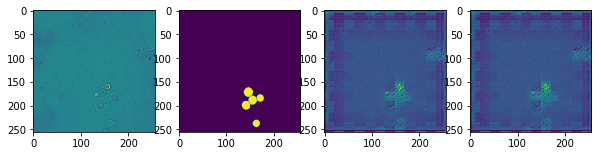

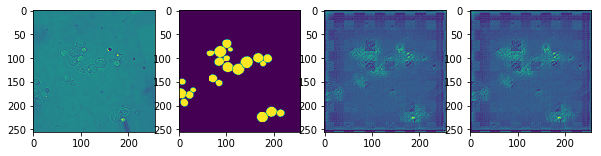

180
Training loss:  0.021715814
(10, 256, 256, 1)
Validation loss:  0.027513852


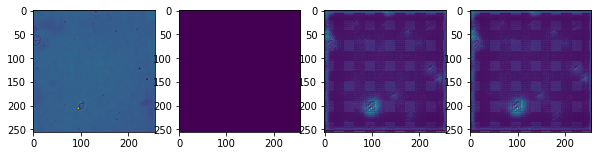

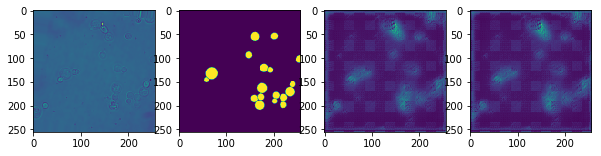

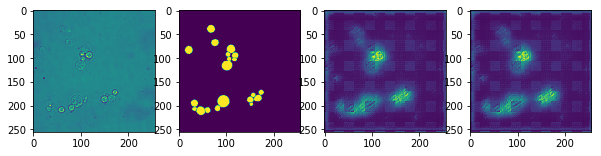

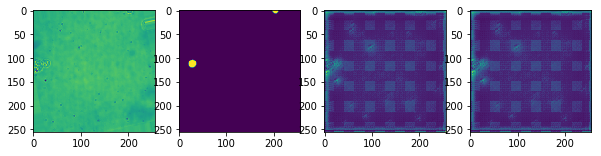

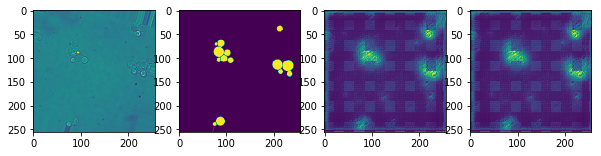

200
Training loss:  0.04040131
(10, 256, 256, 1)
Validation loss:  0.03619758


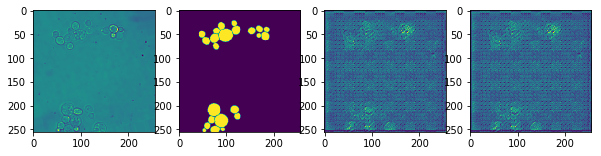

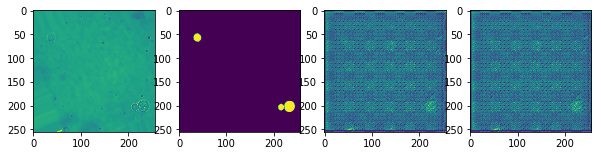

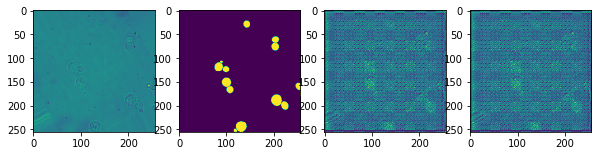

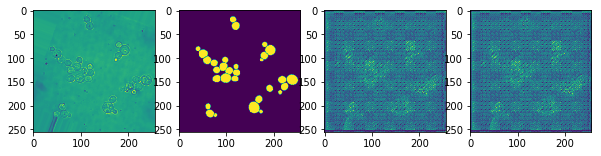

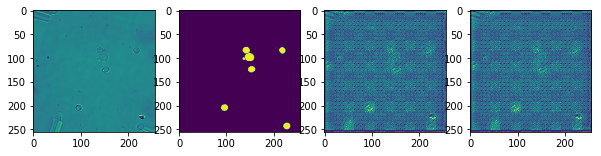

220
Training loss:  0.028169
(10, 256, 256, 1)
Validation loss:  0.038707264


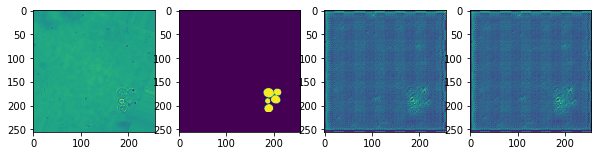

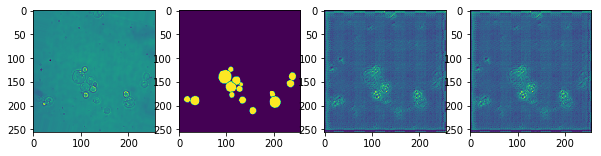

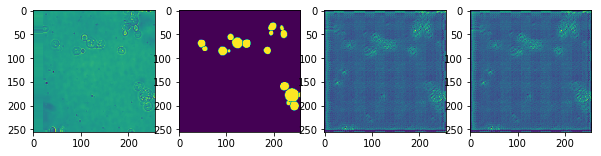

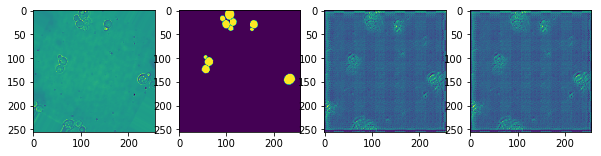

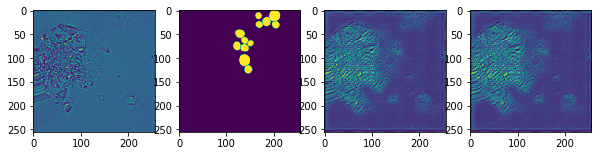

240
Training loss:  0.029720569
(10, 256, 256, 1)
Validation loss:  0.025492018


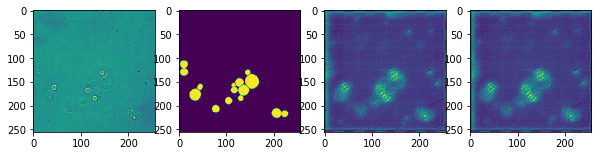

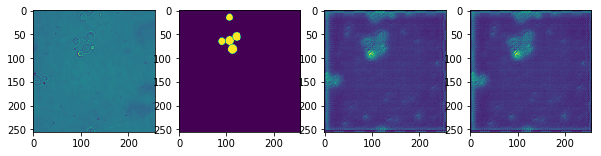

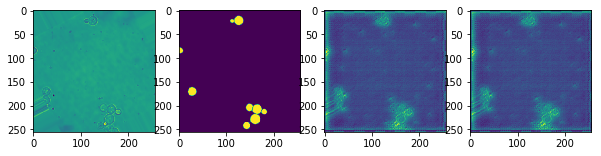

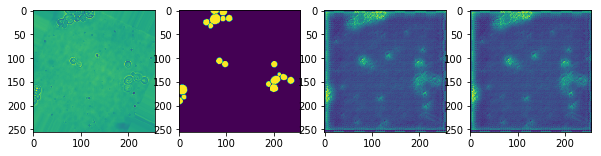

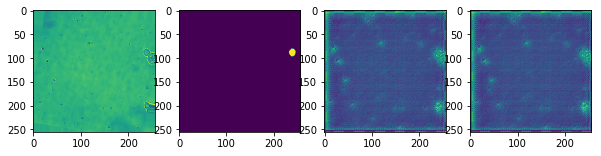

260
Training loss:  0.058314193
(10, 256, 256, 1)
Validation loss:  0.06155467


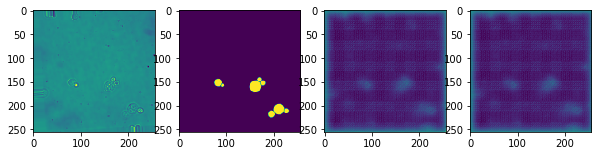

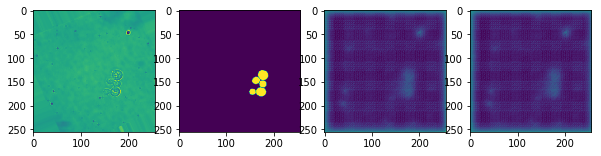

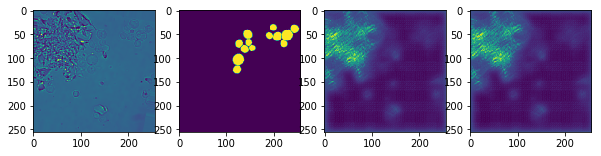

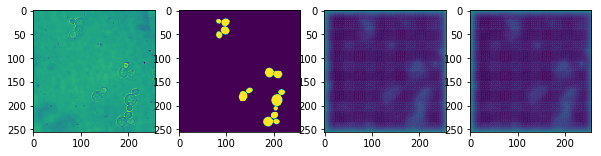

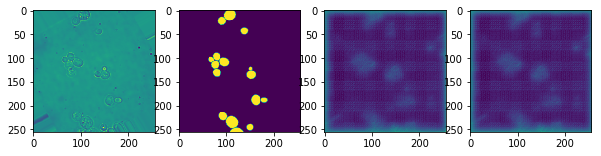

280
Training loss:  0.030297508
(10, 256, 256, 1)
Validation loss:  0.02251802


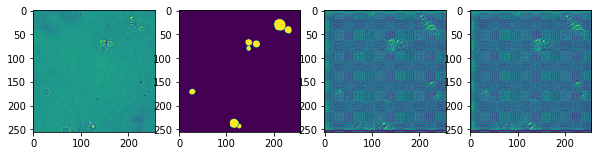

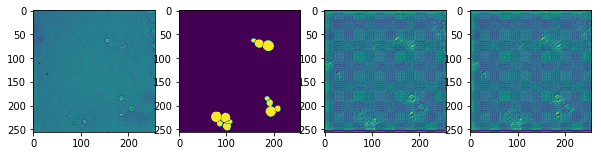

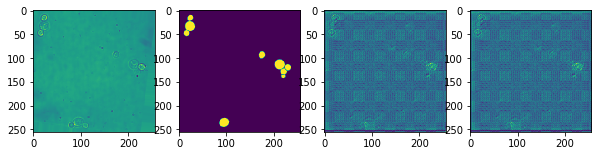

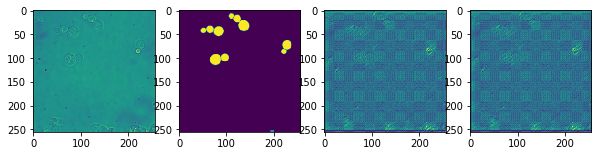

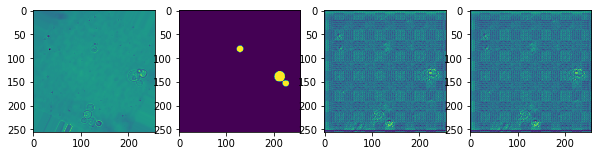

KeyboardInterrupt: 

In [64]:
tf.set_random_seed(123456)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

iterations=[500,500,2000]
lrs=[.0001,.00004, .00001]

for its, ls in zip(iterations, lrs):
    for i in range(its):
        idx=np.random.choice(train_data.shape[0], replace=False, size=[50])
        cur_train=train_data[idx,:,:,:]
        cur_truth=train_truth[idx,:,:]

        cur_train, cur_truth=generate_data()

        _,results, losses=sess.run([train_op, probs, loss], feed_dict={x:cur_train, y:cur_truth, lr:ls})
        if (i%20==0):
            print(i)
            print("Training loss: ",losses)
            idx=np.random.choice(validation_data.shape[0], replace=False, size=[50])
            #idx=range(0,300)
            sub_validation_data=validation_data[idx, :,:,:]
            sub_validation_truth=validation_truth[idx, :,:]

            sub_validation_data, sub_validation_truth=generate_data()

            results, losses, a,c,cc=sess.run([probs, loss, A1,C2,CC2], feed_dict={x:sub_validation_data, y:sub_validation_truth, lr:ls})
            print(results.shape)
            print("Validation loss: ",losses)
            for ti in range (0,5):
                utils.plot_4x1(sub_validation_data[ti,:,:,0], sub_validation_truth[ti,:,:,0], results[ti,:,:,0], results[ti,:,:,0])
                plt.show()
#saver = tf.train.Saver()
#saver.save(sess, data+'Model')

# Unet

In [40]:
data='/home/ubuntu/TransmittedYeast/'

In [41]:
shp=[1,256,256,2]

In [42]:
train_both=utils.get_raw_float_image(data+'TrainingNoOutline_RotShift.raw',shp)
train_data=train_both[:,:,:,[0]]/25000.0
train_truth=train_both[:,:,:,[1]]
train_truth[:,:,:,0]=train_truth[:,:,:,0]/255.0

In [43]:
validation_both=utils.get_raw_float_image(data+'TrainingNoOutline_RotShift.raw', shp)
validation_data=validation_both[:,:,:,[0]]/25000.0
validation_truth=validation_both[:,:,:,[1]]
validation_truth[:,:,:,0]=validation_truth[:,:,:,0]/255.0

In [56]:
def get_unet():
    concat_axis = 3

    inputs = tf.keras.layers.Input((256, 256, 1))
    
    conv1 = tf.keras.layers.Conv2D(32, (3, 3), padding="same", name="conv1_1", activation="relu", data_format="channels_last")(inputs)
    conv1 = tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv1)
    conv2 = tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool1)
    conv2 = tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv2)

    conv3 = tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool2)
    conv3 = tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv3)

    conv4 = tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool3)
    conv4 = tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv4)
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(conv4)

    conv5 = tf.keras.layers.Conv2D(512, (3, 3), padding="same", activation="relu", data_format="channels_last")(pool4)
    conv5 = tf.keras.layers.Conv2D(512, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv5)

    up_conv5 = tf.keras.layers.UpSampling2D(size=(2, 2), data_format="channels_last")(conv5)
    up6   = tf.keras.layers.concatenate([up_conv5, conv4], axis=concat_axis)
    conv6 = tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu", data_format="channels_last")(up6)
    conv6 = tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv6)

    up_conv6 = tf.keras.layers.UpSampling2D(size=(2, 2), data_format="channels_last")(conv6)
    up7   = tf.keras.layers.concatenate([up_conv6, conv3], axis=concat_axis)
    conv7 = tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(up7)
    conv7 = tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv7)

    up_conv7 = tf.keras.layers.UpSampling2D(size=(2, 2), data_format="channels_last")(conv7)
    up8   = tf.keras.layers.concatenate([up_conv7, conv2], axis=concat_axis)
    conv8 = tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(up8)
    conv8 = tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv8)

    up_conv8 = tf.keras.layers.UpSampling2D(size=(2, 2), data_format="channels_last")(conv8)
    up9   = tf.keras.layers.concatenate([up_conv8, conv1], axis=concat_axis)
    print(type(up9))
    conv9 = tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", data_format="channels_last")(up9)
    conv9 = tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", data_format="channels_last")(conv9)
    out=tf.keras.layers.Activation(activation="sigmoid")

    #ch, cw = get_crop_shape(inputs, conv9)
    #conv9  = ZeroPadding2D(padding=(ch[0],cw[0]), data_format="channels_last")(conv9)
    #conv10 = Conv2D(1, (1, 1), data_format="channels_last", activation="sigmoid")(conv9)
    
    #flatten =  Flatten()(conv9)
    #Dense1 = Dense(512, activation='relu')(flatten)
    #BN =BatchNormalization() (Dense1)
    #Dense2 = Dense(17, activation='sigmoid')(BN)
    
    model = tf.keras.Model(inputs=[inputs], outputs=[out])
    
    return model

In [57]:



model = get_unet()


epochs_arr  = [   20,      5,      5]
learn_rates = [0.001, 0.0003, 0.0001]

for learn_rate, epochs in zip(learn_rates, epochs_arr):
    if os.path.isfile(weights_path):
        print("loading existing weight for training")
        model.load_weights(weights_path)
    
    opt  = optimizers.Adam(lr=learn_rate)
    model.compile(loss='mse', # We NEED binary here, since categorical_crossentropy l1 norms the output before calculating loss.
                  optimizer=opt,
                  metrics=['accuracy'])
    callbacks = [EarlyStopping(monitor='val_loss', patience=2, verbose=1),
                 ModelCheckpoint(weights_path, monitor='val_loss', save_best_only=True, verbose=2)]

    model.fit(x = train_data, y= train_truth, validation_data=(train_data, train_truth),
          batch_size=256, verbose=2, epochs=epochs, shuffle=True)


#p_val = model.predict(X_val, batch_size = 128, verbose=1)
#print(fbeta_score(Y_val, np.array(p_val) > 0.2, beta=2, average='samples'))

#p_test = model.predict(x_test, batch_size = 128, verbose=1)

<class 'tensorflow.python.framework.ops.Tensor'>


ValueError: Output tensors to a Model must be the output of a TensorFlow `Layer` (thus holding past layer metadata). Found: <tensorflow.python.keras.layers.core.Activation object at 0x7f7b4e6095c0>